In [28]:
import json
import numpy as np
import pandas as pd
from sympy.solvers import solve
from sympy import Symbol
import scipy.stats as sstats

from utils import SimulateData
from stopsignalmetrics import SSRTmodel, StopData

from generate_remaining_sim_cmds import replace

from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mounting_path = '/Users/henrymj/Documents/mounts/ABCD_ls5'

## Load in abcd data and convert to stop signal metrics format

In [2]:
abcd_data = pd.read_csv('abcd_data/minimal_abcd_clean.csv')

In [3]:
variable_dict = {
   "columns": {
      "ID": "NARGUID", #subject identifier
      "condition": "trial_type", #col with trial types 
      "correct_response": "correct_response", #col with correct reponse codes
      "response": "finger_press", #col with actual response codes 
      "SSD": "SSDDur", #col with stop signal delay 
      "block": "block", #col with which block a trial is accuring during
      "goRT": "go_rt_adjusted", # col with go reaction time recording 
      "stopRT": "stop_rt_adjusted", #col with stop failure reaction time recording
      "choice_accuracy": "choice_accuracy" #col with whether a response was correct
   },
   "key_codes": {
      "go": "GoTrial", # cell values for go trials  
      "stop": "StopTrial",  #cell values for stop trials 
      "correct": 1.0,
       "incorrect": 0.0,
       "noResponse": np.nan
   }
}

In [4]:
abcd_ssrt = StopData(var_dict=variable_dict, compute_acc_col=False)

abcd_proc = abcd_ssrt.fit_transform(abcd_data) 

ssrt_model = SSRTmodel(model='replacement')

ssrt_metrics = ssrt_model.fit_transform(abcd_proc, level='group')

problem_subs = ssrt_metrics[ssrt_metrics.SSRT.isnull()].index

print(f'dropping {len(problem_subs)} subs for having P(respond|signal) == 1 or 0')

ssrt_metrics = ssrt_metrics[ssrt_metrics.SSRT.notnull()].copy()

/Users/henrymj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/henrymj/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dropping 31 subs for having P(respond|signal) == 1 or 0


In [5]:
ssrt_metrics.to_csv('abcd_data/abcd_ssrt_metrics.csv')

In [6]:
expected_df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)
# reformatting - was multiindex
expected_df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(expected_df.loc['underlying distribution', :].values, expected_df.columns)]
expected_df = expected_df.drop(['underlying distribution', 'NARGUID'])

for col in expected_df.columns:
    expected_df[col] = expected_df[col].astype(float)

In [ ]:
expected_df.rank()

In [8]:
monster_df = pd.concat([ssrt_metrics, expected_df, expected_df.rank()], 1, sort=True)

In [10]:
monster_df

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,...,gen-standard_SSRT-graded_mu_go_log.2,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2,gen-graded_mu_go_log_SSRT-guesses,gen-guesses_SSRT-guesses.1,gen-standard_SSRT-guesses.2,gen-graded_mu_go_log_SSRT-graded_mu_go_log,gen-guesses_SSRT-graded_mu_go_log.1,gen-standard_SSRT-graded_mu_go_log.2
003RTV85,273.000000,315.000000,0.466667,2793.0,634.652632,546.107143,15.0,0.050000,0.936842,0.821429,...,400.566667,4655.0,3831.0,3100.5,4203.0,3123.0,2596.0,2388.5,2012.0,1956.0
007W6H7B,166.666667,418.333333,0.433333,2793.0,653.491582,562.000000,3.0,0.010000,0.962963,0.923077,...,320.816667,982.0,454.5,463.0,753.0,383.0,416.0,905.0,776.0,652.0
00CY2MDM,413.500000,72.500000,0.600000,2793.0,467.901408,347.583333,16.0,0.053333,0.852113,0.722222,...,900.600000,6236.0,6851.0,6988.0,6468.0,7158.0,7227.0,6805.5,7101.5,6985.0
00HEV6HB,321.666667,163.333333,0.633333,2793.0,450.200692,373.947368,11.0,0.036667,0.851211,0.657895,...,1089.316667,4443.0,3646.0,5346.0,4711.0,4557.0,5808.0,7675.0,7654.0,7644.0
00J52GPG,394.666667,53.333333,0.600000,2793.0,405.978648,305.194444,19.0,0.063333,0.907473,0.500000,...,955.066667,5002.5,5784.5,6670.5,6097.0,6945.0,7416.0,6620.0,7044.0,7302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v49bv0fe,55.500000,557.500000,0.250000,2793.0,470.041667,458.866667,204.0,0.680000,0.781250,0.600000,...,NaN,NaN,6.0,NaN,NaN,13.0,NaN,NaN,2465.5,NaN
ve4u5,233.666667,188.333333,0.450000,2793.0,451.784452,387.851852,17.0,0.056667,0.964664,0.851852,...,462.000000,1499.5,1705.0,1593.0,1711.0,2152.0,2261.0,2447.0,3041.0,3334.5
wzrf2ge6,237.000000,305.000000,0.450000,2793.0,591.981818,502.111111,25.0,0.083333,0.978182,0.925926,...,362.033333,2234.0,2655.0,2210.0,1884.0,2228.0,1935.0,1002.5,1373.0,1231.0
x8k59,283.333333,186.666667,0.466667,2793.0,488.622837,385.892857,11.0,0.036667,0.937716,0.642857,...,578.500000,3549.5,4746.0,3971.0,3791.0,4675.0,4175.0,5326.5,5195.0,5220.0


In [14]:
monster_df['gen-standard_SSRT-standard.2']

,gen-standard_SSRT-standard.2,gen-standard_SSRT-standard.2
003RTV85,229.183333,3100.5
007W6H7B,164.450000,463.0
00CY2MDM,305.300000,6988.0
00HEV6HB,263.883333,5346.0
00J52GPG,294.150000,6670.5
...,...,...
v49bv0fe,NaN,NaN
ve4u5,202.283333,1593.0
wzrf2ge6,214.066667,2210.0
x8k59,241.783333,3971.0


In [13]:
_ = sns.scatterplot(x='SSRT', y='gen-standard_SSRT-standard.2', data=monster_df)

ValueError: could not broadcast input array from shape (8207) into shape (2)

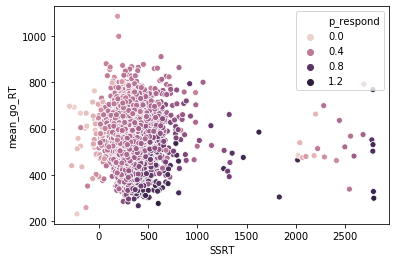

In [11]:
_ = sns.scatterplot(x='SSRT', y='mean_go_RT', hue='p_respond', data=monster_df)

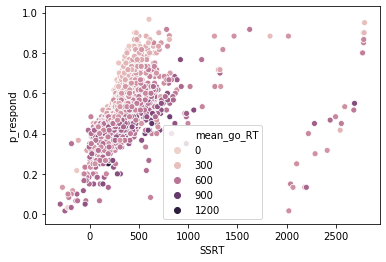

In [12]:
_ = sns.scatterplot(x='SSRT', y='p_respond', hue='mean_go_RT', data=monster_df)

In [15]:
monster_df.query('SSRT < 0').filter(regex='SSRT')

,SSRT,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2,gen-graded_mu_go_log_SSRT-guesses,gen-guesses_SSRT-guesses.1,gen-standard_SSRT-guesses.2,gen-graded_mu_go_log_SSRT-graded_mu_go_log,gen-guesses_SSRT-graded_mu_go_log.1,gen-standard_SSRT-graded_mu_go_log.2,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2,gen-graded_mu_go_log_SSRT-guesses,gen-guesses_SSRT-guesses.1,gen-standard_SSRT-guesses.2,gen-graded_mu_go_log_SSRT-graded_mu_go_log,gen-guesses_SSRT-graded_mu_go_log.1,gen-standard_SSRT-graded_mu_go_log.2
0X38WL5R,-128.500000,NaN,559.300000,554.633333,NaN,528.108559,519.654416,NaN,NaN,NaN,NaN,7914.0,7905.0,NaN,7916.0,7898.0,NaN,NaN,NaN
26K18JMC,-250.333333,574.483333,585.900000,557.250000,516.023979,514.494952,517.462262,NaN,NaN,NaN,7868.0,7927.0,7907.0,7863.0,7910.0,7895.0,NaN,NaN,NaN
2RB7270C,-138.833333,609.400000,549.766667,529.466667,545.284121,532.935412,497.109983,NaN,NaN,NaN,7874.0,7909.0,7889.0,7870.0,7917.0,7876.0,NaN,NaN,NaN
35V4K19A,-38.166667,516.183333,460.600000,521.500000,489.674910,445.255755,495.826468,NaN,NaN,NaN,7853.0,7850.0,7885.0,7848.0,7864.0,7875.0,NaN,NaN,NaN
3ERJWDKZ,-172.000000,675.316667,NaN,416.833333,682.231712,NaN,447.009025,NaN,NaN,NaN,7876.0,NaN,7825.0,7876.0,NaN,7843.0,NaN,NaN,NaN
3MNR8TC0,-222.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5jgg99zm,-45.500000,592.633333,464.933333,465.333333,571.143768,468.913757,453.541234,NaN,NaN,NaN,7873.0,7857.0,7857.0,7875.0,7876.0,7853.0,NaN,NaN,NaN
8VJ8LJ3D,-184.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9EVRB30H,-186.500000,539.150000,611.283333,574.016667,496.302728,536.371496,516.906583,NaN,NaN,NaN,7865.0,7934.0,7914.0,7853.0,7918.0,7894.0,NaN,NaN,NaN
A4PJGHJV,-114.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
monster_df.query('SSRT < 0')

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,...,gen-standard_SSRT-graded_mu_go_log.2,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2,gen-graded_mu_go_log_SSRT-guesses,gen-guesses_SSRT-guesses.1,gen-standard_SSRT-guesses.2,gen-graded_mu_go_log_SSRT-graded_mu_go_log,gen-guesses_SSRT-graded_mu_go_log.1,gen-standard_SSRT-graded_mu_go_log.2
0X38WL5R,-128.500000,677.500000,0.100000,2793.0,666.913978,787.666667,207.0,0.690000,0.946237,1.000000,...,NaN,NaN,7914.0,7905.0,NaN,7916.0,7898.0,NaN,NaN,NaN
26K18JMC,-250.333333,753.333333,0.016667,2793.0,692.777778,677.000000,273.0,0.910000,1.000000,1.000000,...,NaN,7868.0,7927.0,7907.0,7863.0,7910.0,7895.0,NaN,NaN,NaN
2RB7270C,-138.833333,765.833333,0.066667,2793.0,601.741935,459.000000,269.0,0.896667,0.935484,0.750000,...,NaN,7874.0,7909.0,7889.0,7870.0,7917.0,7876.0,NaN,NaN,NaN
35V4K19A,-38.166667,694.166667,0.066667,2793.0,593.407407,510.750000,273.0,0.910000,0.851852,1.000000,...,NaN,7853.0,7850.0,7885.0,7848.0,7864.0,7875.0,NaN,NaN,NaN
3ERJWDKZ,-172.000000,610.000000,0.116667,2793.0,434.968254,315.428571,237.0,0.790000,0.920635,0.571429,...,NaN,7876.0,NaN,7825.0,7876.0,NaN,7843.0,NaN,NaN,NaN
3MNR8TC0,-222.166667,769.166667,0.033333,2793.0,231.700000,402.500000,290.0,0.966667,0.200000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5jgg99zm,-45.500000,662.500000,0.200000,2793.0,519.958904,542.750000,227.0,0.756667,0.835616,0.583333,...,NaN,7873.0,7857.0,7857.0,7875.0,7876.0,7853.0,NaN,NaN,NaN
8VJ8LJ3D,-184.000000,690.000000,0.350000,2793.0,604.462745,539.095238,45.0,0.150000,0.988235,0.904762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9EVRB30H,-186.500000,727.500000,0.033333,2793.0,666.809524,853.000000,279.0,0.930000,0.952381,0.000000,...,NaN,7865.0,7934.0,7914.0,7853.0,7918.0,7894.0,NaN,NaN,NaN
A4PJGHJV,-114.666667,501.666667,0.366667,2793.0,352.058442,301.954545,146.0,0.486667,0.389610,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
monster_df.query('SSRT > 1000').filter(regex='SSRT')

,SSRT,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2,gen-graded_mu_go_log_SSRT-guesses,gen-guesses_SSRT-guesses.1,gen-standard_SSRT-guesses.2,gen-graded_mu_go_log_SSRT-graded_mu_go_log,gen-guesses_SSRT-graded_mu_go_log.1,gen-standard_SSRT-graded_mu_go_log.2,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2,gen-graded_mu_go_log_SSRT-guesses,gen-guesses_SSRT-guesses.1,gen-standard_SSRT-guesses.2,gen-graded_mu_go_log_SSRT-graded_mu_go_log,gen-guesses_SSRT-graded_mu_go_log.1,gen-standard_SSRT-graded_mu_go_log.2
00LJVZK2,2542.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04JY6730,2688.000000,444.016667,632.316667,517.950000,353.042011,506.488922,420.889228,939.233333,1456.483333,1217.516667,7825.0,7939.0,7880.0,7807.0,7906.0,7824.0,7713.0,7762.0,7719.0
0HB853U9,1322.166667,349.466667,553.383333,489.666667,291.330394,444.075699,394.730841,720.250000,1279.433333,1108.133333,7801.0,7913.0,7866.0,7766.0,7863.0,7796.0,7564.0,7749.0,7668.0
0N5WVJ17,2440.500000,432.516667,514.150000,491.066667,418.907111,495.118901,472.039036,NaN,NaN,NaN,7821.0,7890.0,7867.0,7819.0,7896.0,7863.0,NaN,NaN,NaN
11G4DZFX,1352.166667,290.433333,453.750000,450.700000,292.515672,446.299957,445.815695,681.433333,1275.150000,1250.816667,7704.0,7840.0,7852.0,7768.0,7867.0,7841.0,7480.0,7748.0,7727.0
26TYCJFN,2038.833333,398.233333,362.350000,938.933333,385.734257,348.113952,936.694604,NaN,NaN,NaN,7815.0,7581.0,7925.0,7812.0,7613.0,7925.0,NaN,NaN,NaN
2L40420R,1465.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31TXVMM1,1830.666667,231.366667,318.350000,378.550000,318.670609,468.629986,592.190394,803.350000,1410.683333,1985.466667,6804.0,7041.0,7749.0,7798.0,7875.0,7920.0,7667.0,7760.0,7759.0
3MJ73KP6,2495.500000,413.833333,507.050000,459.750000,403.648289,482.113264,453.578531,NaN,NaN,NaN,7817.0,7886.0,7854.0,7816.0,7885.0,7854.0,NaN,NaN,NaN
6EJF2KCZ,2769.666667,338.416667,537.766667,501.933333,315.425415,485.676301,450.473355,774.916667,1461.550000,1327.683333,7792.0,7905.0,7872.0,7795.0,7891.0,7847.0,7641.0,7763.0,7742.0


In [18]:
monster_df.query('SSRT > 1000')

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,...,gen-standard_SSRT-graded_mu_go_log.2,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2,gen-graded_mu_go_log_SSRT-guesses,gen-guesses_SSRT-guesses.1,gen-standard_SSRT-guesses.2,gen-graded_mu_go_log_SSRT-graded_mu_go_log,gen-guesses_SSRT-graded_mu_go_log.1,gen-standard_SSRT-graded_mu_go_log.2
00LJVZK2,2542.166667,250.833333,0.416667,2793.0,338.740385,461.040000,196.0,0.653333,0.682692,0.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04JY6730,2688.000000,105.000000,0.550000,2793.0,792.345912,869.151515,141.0,0.470000,0.597484,0.515152,...,1217.516667,7825.0,7939.0,7880.0,7807.0,7906.0,7824.0,7713.0,7762.0,7719.0
0HB853U9,1322.166667,35.833333,0.700000,2793.0,660.830275,725.904762,82.0,0.273333,0.568807,0.476190,...,1108.133333,7801.0,7913.0,7866.0,7766.0,7863.0,7796.0,7564.0,7749.0,7668.0
0N5WVJ17,2440.500000,352.500000,0.466667,2793.0,635.566176,532.035714,164.0,0.546667,0.602941,0.535714,...,NaN,7821.0,7890.0,7867.0,7819.0,7896.0,7863.0,NaN,NaN,NaN
11G4DZFX,1352.166667,20.833333,0.816667,2793.0,494.052419,528.387755,52.0,0.173333,0.754032,0.530612,...,1250.816667,7704.0,7840.0,7852.0,7768.0,7867.0,7841.0,7480.0,7748.0,7727.0
26TYCJFN,2038.833333,754.166667,0.150000,2793.0,539.390244,498.777778,259.0,0.863333,0.439024,0.333333,...,NaN,7815.0,7581.0,7925.0,7812.0,7613.0,7925.0,NaN,NaN,NaN
2L40420R,1465.333333,11.666667,0.883333,2793.0,475.670412,433.698113,33.0,0.110000,0.625468,0.603774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31TXVMM1,1830.666667,18.333333,0.883333,2793.0,304.696629,415.018868,33.0,0.110000,0.640449,0.471698,...,1985.466667,6804.0,7041.0,7749.0,7798.0,7875.0,7920.0,7667.0,7760.0,7759.0
3MJ73KP6,2495.500000,297.500000,0.483333,2793.0,521.159722,499.344828,156.0,0.520000,0.666667,0.448276,...,NaN,7817.0,7886.0,7854.0,7816.0,7885.0,7854.0,NaN,NaN,NaN
6EJF2KCZ,2769.666667,23.333333,0.800000,2793.0,551.538071,703.666667,103.0,0.343333,0.720812,0.479167,...,1327.683333,7792.0,7905.0,7872.0,7795.0,7891.0,7847.0,7641.0,7763.0,7742.0


In [19]:
abcd_proc.query("ID == '00LJVZK2' and goRT >= 0").describe()

,goRT,stopRT,SSD,correct_go_response,correct_stop,SSD.RESP,Fix.RESP,StopSignal.RESP,Go.RESP,TrialNum,correct_stimulus_mapping_1,correct_stimulus_mapping_2,block,response,correct_response,choice_accuracy
count,104.000000,0.0,0.0,104.000000,0.0,0.0,66.000000,0.0,101.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,338.740385,NaN,NaN,0.605769,NaN,NaN,1.424242,NaN,1.386139,127.153846,1.509615,3.490385,1.298077,1.423077,1.509615,0.682692
std,280.471759,NaN,NaN,0.491051,NaN,NaN,0.498015,NaN,0.489291,88.119487,0.502328,0.502328,0.459629,0.496440,0.502328,0.467682
min,1.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
25%,139.500000,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,1.000000,55.750000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
50%,279.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,1.000000,107.500000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000
75%,467.000000,NaN,NaN,1.000000,NaN,NaN,2.000000,NaN,2.000000,205.500000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000
max,1630.000000,NaN,NaN,1.000000,NaN,NaN,2.000000,NaN,2.000000,348.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [20]:
abcd_proc.query("ID == '00LJVZK2'").describe()

,goRT,stopRT,SSD,correct_go_response,correct_stop,SSD.RESP,Fix.RESP,StopSignal.RESP,Go.RESP,TrialNum,correct_stimulus_mapping_1,correct_stimulus_mapping_2,block,response,correct_response,choice_accuracy
count,104.000000,25.000000,60.000000,300.000000,60.000000,5.000000,85.000000,13.000000,101.000000,360.000000,360.000000,360.000000,360.000000,129.000000,360.000000,129.000000
mean,338.740385,461.040000,250.833333,0.210000,0.583333,1.600000,1.376471,1.615385,1.386139,180.500000,1.500000,3.500000,1.502778,1.426357,1.500000,0.643411
std,280.471759,449.138943,224.833586,0.407989,0.497167,0.547723,0.487376,0.506370,0.489291,104.067286,0.500696,0.500696,0.500688,0.496475,0.500696,0.480859
min,1.000000,46.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
25%,139.500000,185.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,90.750000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
50%,279.000000,250.000000,200.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,180.500000,1.500000,3.500000,2.000000,1.000000,1.500000,1.000000
75%,467.000000,534.000000,400.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,270.250000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000
max,1630.000000,1839.000000,850.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,360.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [21]:
rt_std = abcd_proc.groupby('ID').apply(lambda x: x.describe().loc[['mean', 'std'], 'goRT'])
rt_std

goRT,mean,std
ID,,
003RTV85,634.652632,169.271353
007W6H7B,653.491582,178.164613
00CY2MDM,467.901408,200.308095
00HEV6HB,450.200692,228.866837
00J52GPG,405.978648,157.648749
...,...,...
vcahyykd,NaN,NaN
ve4u5,451.784452,132.458823
wzrf2ge6,591.981818,186.033696


In [23]:
monster_df = pd.concat([rt_std, monster_df], 1, sort=True)

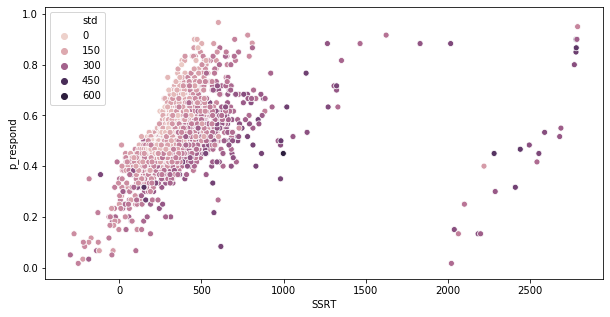

In [34]:
fig = plt.figure(figsize=(10,5))
_ = sns.scatterplot(x='SSRT', y='p_respond', hue='std', data=monster_df)

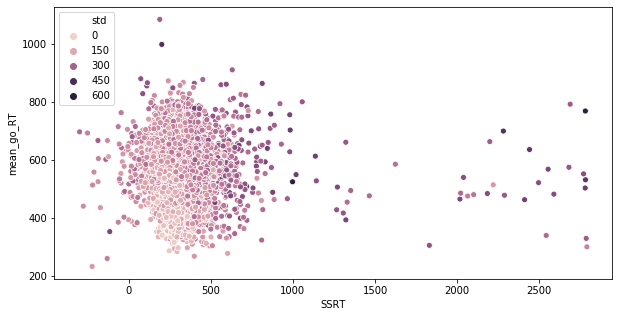

In [35]:
fig = plt.figure(figsize=(10,5))
_ = sns.scatterplot(x='SSRT', y='mean_go_RT', hue='std', data=monster_df)

In [26]:
monster_df.query('SSRT > 1000')

,mean,std,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,...,gen-standard_SSRT-graded_mu_go_log.2,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2,gen-graded_mu_go_log_SSRT-guesses,gen-guesses_SSRT-guesses.1,gen-standard_SSRT-guesses.2,gen-graded_mu_go_log_SSRT-graded_mu_go_log,gen-guesses_SSRT-graded_mu_go_log.1,gen-standard_SSRT-graded_mu_go_log.2
00LJVZK2,338.740385,280.471759,2542.166667,250.833333,0.416667,2793.0,338.740385,461.040000,196.0,0.653333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04JY6730,792.345912,310.702837,2688.000000,105.000000,0.550000,2793.0,792.345912,869.151515,141.0,0.470000,...,1217.516667,7825.0,7939.0,7880.0,7807.0,7906.0,7824.0,7713.0,7762.0,7719.0
0HB853U9,660.830275,328.296614,1322.166667,35.833333,0.700000,2793.0,660.830275,725.904762,82.0,0.273333,...,1108.133333,7801.0,7913.0,7866.0,7766.0,7863.0,7796.0,7564.0,7749.0,7668.0
0N5WVJ17,635.566176,414.078821,2440.500000,352.500000,0.466667,2793.0,635.566176,532.035714,164.0,0.546667,...,NaN,7821.0,7890.0,7867.0,7819.0,7896.0,7863.0,NaN,NaN,NaN
11G4DZFX,494.052419,293.131358,1352.166667,20.833333,0.816667,2793.0,494.052419,528.387755,52.0,0.173333,...,1250.816667,7704.0,7840.0,7852.0,7768.0,7867.0,7841.0,7480.0,7748.0,7727.0
26TYCJFN,539.390244,349.340942,2038.833333,754.166667,0.150000,2793.0,539.390244,498.777778,259.0,0.863333,...,NaN,7815.0,7581.0,7925.0,7812.0,7613.0,7925.0,NaN,NaN,NaN
2L40420R,475.670412,278.466956,1465.333333,11.666667,0.883333,2793.0,475.670412,433.698113,33.0,0.110000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31TXVMM1,304.696629,332.658320,1830.666667,18.333333,0.883333,2793.0,304.696629,415.018868,33.0,0.110000,...,1985.466667,6804.0,7041.0,7749.0,7798.0,7875.0,7920.0,7667.0,7760.0,7759.0
3MJ73KP6,521.159722,346.436599,2495.500000,297.500000,0.483333,2793.0,521.159722,499.344828,156.0,0.520000,...,NaN,7817.0,7886.0,7854.0,7816.0,7885.0,7854.0,NaN,NaN,NaN
6EJF2KCZ,551.538071,348.672694,2769.666667,23.333333,0.800000,2793.0,551.538071,703.666667,103.0,0.343333,...,1327.683333,7792.0,7905.0,7872.0,7795.0,7891.0,7847.0,7641.0,7763.0,7742.0


In [ ]:
with open('abcd_data/individual_mus.json') as f:
    mus_dict = json.load(f)

In [36]:
sim_rt_dict = {}
for sim_file in glob('/Users/henrymj/Documents/mounts/ABCD_ls5/simulated_data/individual_data/standard_*.csv')[:5]:
    subid = sim_file.split('_')[-1].replace('.csv','')
    sim_rt_dict[subid] = pd.read_csv(sim_file).describe().loc[['mean', 'std'], 'goRT']


In [37]:
sim_rt_dict

{}